<a href="https://colab.research.google.com/github/Hp-11/Neural-Network-Project-HAR/blob/main/NeuralNetwork_Human_Acitivity_Recognisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.preprocessing


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving WISDM_ar_v1.1_raw.txt to WISDM_ar_v1.1_raw (1).txt


In [ ]:
import io
# rawtext = io.BytesIO(uploaded['WISDM_ar_v1.1_raw.txt'])
file = open('WISDM_ar_v1.1_raw.txt')
lines = file.readlines()


In [ ]:
prossesedlist = []
for i, line in enumerate(lines):
  try:
    line=line.split(',')
    last = line[5].split(';')[0]
    last = last.strip()
    if last == '':
      break;
    temp = [line[0],line[1],line[2],line[3],line[4],last]
    prossesedlist.append(temp)
  except:
    print('error at line: ',i)

error at line:  281873
error at line:  281874
error at line:  281875


In [ ]:
prossesedlist

[['33', 'Jogging', '49105962326000', '-0.6946377', '12.680544', '0.50395286'],
 ['33', 'Jogging', '49106062271000', '5.012288', '11.264028', '0.95342433'],
 ['33', 'Jogging', '49106112167000', '4.903325', '10.882658', '-0.08172209'],
 ['33', 'Jogging', '49106222305000', '-0.61291564', '18.496431', '3.0237172'],
 ['33', 'Jogging', '49106332290000', '-1.1849703', '12.108489', '7.205164'],
 ['33', 'Jogging', '49106442306000', '1.3756552', '-2.4925237', '-6.510526'],
 ['33', 'Jogging', '49106542312000', '-0.61291564', '10.56939', '5.706926'],
 ['33', 'Jogging', '49106652389000', '-0.50395286', '13.947236', '7.0553403'],
 ['33', 'Jogging', '49106762313000', '-8.430995', '11.413852', '5.134871'],
 ['33', 'Jogging', '49106872299000', '0.95342433', '1.3756552', '1.6480621'],
 ['33', 'Jogging', '49106982315000', '-8.19945', '19.57244', '2.7240696'],
 ['33', 'Jogging', '49107092330000', '1.4165162', '5.7886477', '2.982856'],
 ['33', 'Jogging', '49107202316000', '-1.879608', '-2.982856', '-0.2996

In [ ]:
colums = ['user','activity','timestamp','x','y','z']

In [ ]:
data = pd.DataFrame(data=prossesedlist , columns=colums)
data.head()

,user,activity,timestamp,x,y,z
0,33,Jogging,49105962326000,-0.6946377,12.680544,0.50395286
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209
3,33,Jogging,49106222305000,-0.61291564,18.496431,3.0237172
4,33,Jogging,49106332290000,-1.1849703,12.108489,7.205164


In [ ]:
data.shape

(343416, 6)

In [ ]:
data.info

<bound method DataFrame.info of        user activity       timestamp            x          y            z
0        33  Jogging  49105962326000   -0.6946377  12.680544   0.50395286
1        33  Jogging  49106062271000     5.012288  11.264028   0.95342433
2        33  Jogging  49106112167000     4.903325  10.882658  -0.08172209
3        33  Jogging  49106222305000  -0.61291564  18.496431    3.0237172
4        33  Jogging  49106332290000   -1.1849703  12.108489     7.205164
...     ...      ...             ...          ...        ...          ...
343411   11  Walking   1786872234000         0.31      10.73  0.040861044
343412   11  Walking   1786922282000         2.76      10.95   0.84446156
343413   11  Walking   1786972392000          0.8      10.15     1.334794
343414   11  Walking   1787022227000        -1.57       8.69    1.4165162
343415   11  Walking   1787072368000        -2.56       8.58     1.879608

[343416 rows x 6 columns]>

In [ ]:
data['activity'].value_counts()

Walking       137375
Jogging       129392
Upstairs       35137
Downstairs     33358
Sitting         4599
Standing        3555
Name: activity, dtype: int64

Balancing Data 

In [ ]:
data['x'] = data['x'].astype('float')
data['y'] = data['y'].astype('float')
data['z'] = data['z'].astype('float')

In [ ]:
data.info

<bound method DataFrame.info of        user activity       timestamp         x          y         z
0        33  Jogging  49105962326000 -0.694638  12.680544  0.503953
1        33  Jogging  49106062271000  5.012288  11.264028  0.953424
2        33  Jogging  49106112167000  4.903325  10.882658 -0.081722
3        33  Jogging  49106222305000 -0.612916  18.496431  3.023717
4        33  Jogging  49106332290000 -1.184970  12.108489  7.205164
...     ...      ...             ...       ...        ...       ...
343411   11  Walking   1786872234000  0.310000  10.730000  0.040861
343412   11  Walking   1786922282000  2.760000  10.950000  0.844462
343413   11  Walking   1786972392000  0.800000  10.150000  1.334794
343414   11  Walking   1787022227000 -1.570000   8.690000  1.416516
343415   11  Walking   1787072368000 -2.560000   8.580000  1.879608

[343416 rows x 6 columns]>

In [ ]:
Fs=20

In [ ]:
activities = data['activity'].value_counts().index
activities

Index(['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing'], dtype='object')

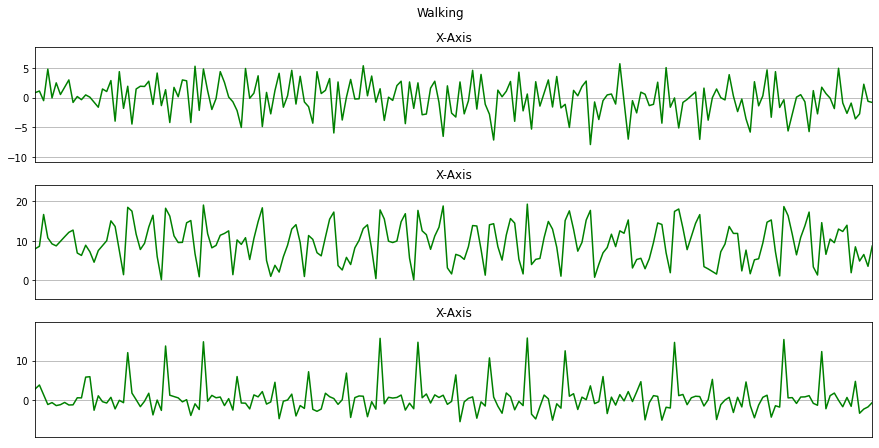

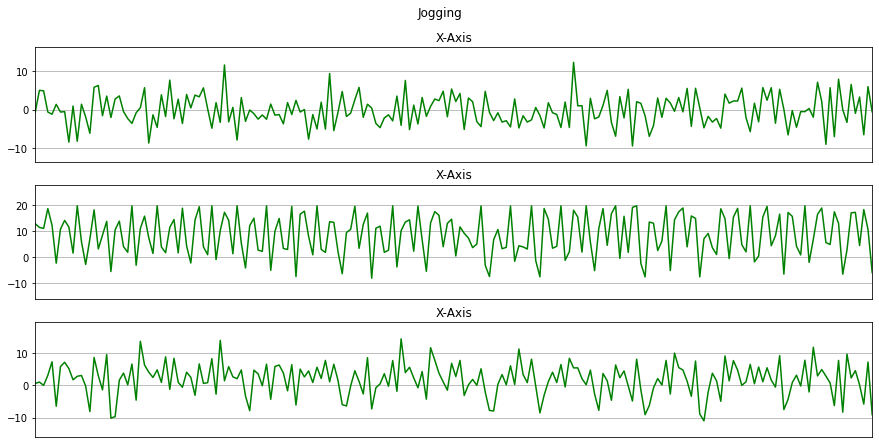

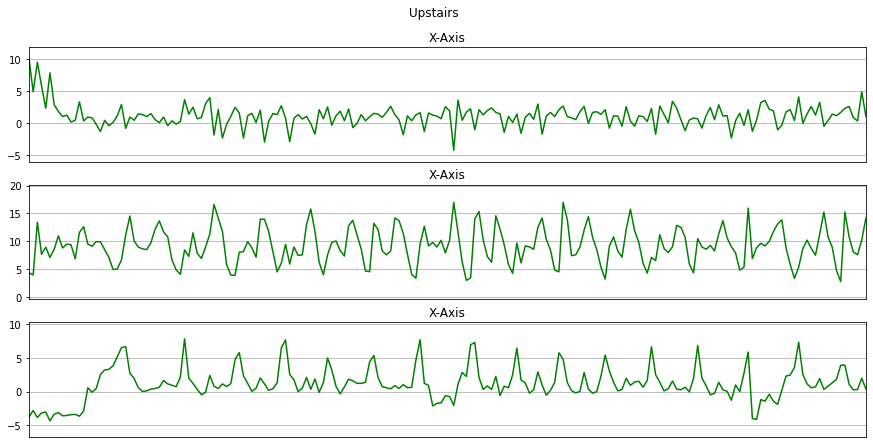

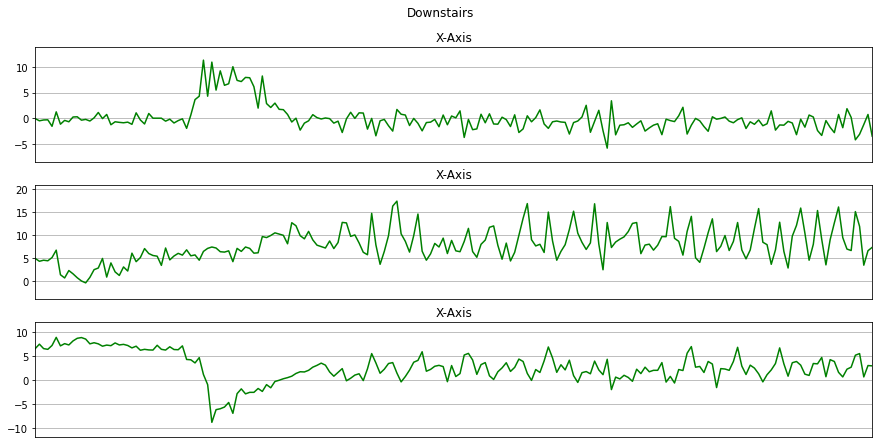

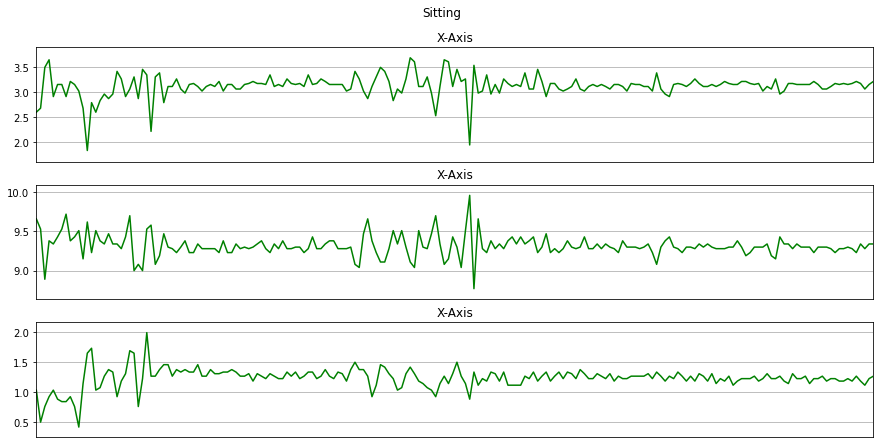

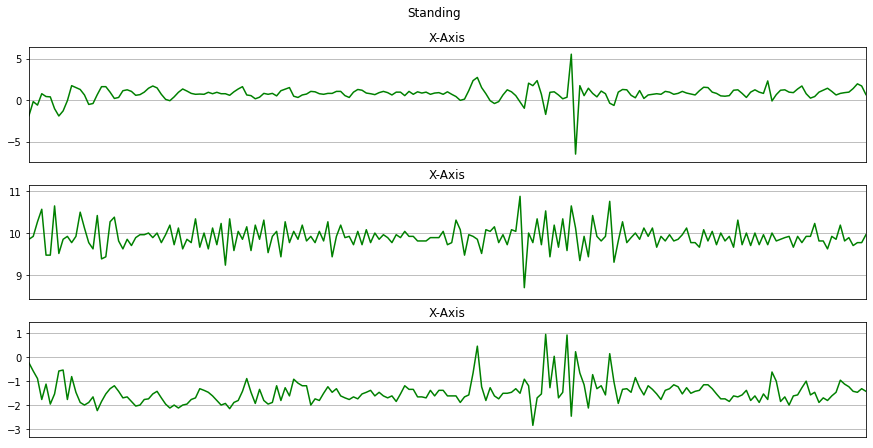

In [ ]:
def plot_activity(activity,data):
  fig, (ax0,ax1,ax2) = plt.subplots(nrows=3,figsize=(15,7), sharex=True)
  plot_axis(ax0,data['timestamp'],data['x'],'X-Axis')
  plot_axis(ax1,data['timestamp'],data['y'],'X-Axis')
  plot_axis(ax2,data['timestamp'],data['z'],'X-Axis')
  plt.subplots_adjust(hspace=0.2)
  fig.suptitle(activity)
  plt.subplots_adjust(top=0.90)
  plt.show()
def plot_axis(ax,x,y,title):
  ax.plot(x,y,'g')
  ax.set_title(title)
  ax.xaxis.set_visible(False)
  ax.set_ylim([min(y)-np.std(y),max(y)+np.std(y)])
  ax.set_xlim([min(x),max(x)])
  ax.grid(True)
for activity in activities:
  data_for_plot = data[(data['activity']==activity)][:Fs*10]
  plot_activity(activity, data_for_plot)

In [ ]:
df = data.drop(['user','timestamp'],axis=1).copy()
df.head()

,activity,x,y,z
0,Jogging,-0.694638,12.680544,0.503953
1,Jogging,5.012288,11.264028,0.953424
2,Jogging,4.903325,10.882658,-0.081722
3,Jogging,-0.612916,18.496431,3.023717
4,Jogging,-1.184970,12.108489,7.205164


In [ ]:
df['activity'].value_counts()

Walking       137375
Jogging       129392
Upstairs       35137
Downstairs     33358
Sitting         4599
Standing        3555
Name: activity, dtype: int64

In [ ]:
Walking = df[df['activity']=="Walking"].head(3555).copy()
Jogging = df[df['activity']=="Jogging"].head(3555).copy()
Sitting = df[df['activity']=="Sitting"].head(3555).copy()
Standing = df[df['activity']=="Standing"].head(3555).copy()


In [ ]:
balanced_data = pd.DataFrame()
balanced_data = balanced_data.append([Walking,Sitting,Standing,Jogging])
balanced_data.head()

,activity,x,y,z
597,Walking,0.844462,8.008764,2.792171
598,Walking,1.116869,8.621680,3.786457
599,Walking,-0.503953,16.657684,1.307553
600,Walking,4.794363,10.760075,-1.184970
601,Walking,-0.040861,9.234595,-0.694638


In [ ]:
print(balanced_data.shape)
balanced_data['activity'].value_counts()

(14220, 4)


Sitting     3555
Jogging     3555
Walking     3555
Standing    3555
Name: activity, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
balanced_data['label'] = label.fit_transform(balanced_data['activity'])
balanced_data.head()

,activity,x,y,z,label
597,Walking,0.844462,8.008764,2.792171,3
598,Walking,1.116869,8.621680,3.786457,3
599,Walking,-0.503953,16.657684,1.307553,3
600,Walking,4.794363,10.760075,-1.184970,3
601,Walking,-0.040861,9.234595,-0.694638,3


In [ ]:
balanced_data[['label','activity']].value_counts()

label  activity
3      Walking     3555
2      Standing    3555
1      Sitting     3555
0      Jogging     3555
dtype: int64

In [ ]:
label.classes_

array(['Jogging', 'Sitting', 'Standing', 'Walking'], dtype=object)

DATA Standerdization

In [ ]:
x = balanced_data[['x','y','z']]
y = balanced_data['label']

In [ ]:
scaler = sklearn.preprocessing.StandardScaler()
X = scaler.fit_transform(x)
scaledX = pd.DataFrame(data=X , columns=['x','y','z'])
scaledX['label'] = y.values
scaledX

,x,y,z,label
0,-0.004042,-0.051927,0.373298,3
1,0.062830,0.056133,0.644891,3
2,-0.335057,1.472922,-0.032231,3
3,0.965597,0.433143,-0.713073,3
4,-0.221375,0.164193,-0.579137,3
...,...,...,...,...
14215,0.935505,-1.929773,-0.430319,0
14216,-1.471875,-3.300937,-2.889537,0
14217,-0.559077,-0.808349,1.809392,0
14218,-0.662728,-1.084502,-2.126844,0


**Frame Preperation**

In [ ]:
import scipy.stats as stats

In [ ]:
Fs = 20
frame_size = Fs*4
hop_size = Fs*2

In [ ]:
def get_frames(df, frame_size,hop_size):
  N_FEATURES=3
  frames = []
  labels = []
  for i in range(0,len(df)-frame_size,hop_size):
    x = df['x'].values[i: i+frame_size]
    y = df['y'].values[i: i+frame_size]
    z = df['z'].values[i: i+frame_size]
    label = stats.mode(df['label'][i: i + frame_size])[0][0]
    frames.append([x,y,z])
    labels.append(label)
  frames = np.asarray(frames).reshape(-1,frame_size, N_FEATURES)
  labels = np.asarray(labels)

  return frames,labels

In [ ]:
x, y = get_frames(scaledX, frame_size, hop_size)

In [ ]:
x.shape, y.shape

((354, 80, 3), (354,))

In [ ]:
(3555*4)/40

355.5

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0,stratify=y)


In [ ]:
print(x_train.shape)
x_test.shape

(283, 80, 3)


(71, 80, 3)

In [ ]:
x_test[0].shape , x_train[0].shape

((80, 3), (80, 3))

In [ ]:
x_train=x_train.reshape(283, 80, 3,1)
x_test=x_test.reshape(71, 80, 3,1)

In [ ]:
x_test[0].shape , x_train[0].shape

((80, 3, 1), (80, 3, 1))

**2D CNN Model**

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()
model.add(Conv2D(16, (2, 2), activation = 'relu', input_shape = x_train[0].shape))
model.add(Dropout(0.1))

model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax'))

In [ ]:
model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])


In [ ]:
history = model.fit(x_train, y_train, epochs = 10, validation_data= (x_test, y_test), verbose=1)


Epoch 1/10
9/9 [==============================] - 1s 39ms/step - loss: 1.4458 - accuracy: 0.3074 - val_loss: 1.0314 - val_accuracy: 0.3521
Epoch 2/10
9/9 [==============================] - 0s 12ms/step - loss: 0.9231 - accuracy: 0.5936 - val_loss: 0.6665 - val_accuracy: 0.9718
Epoch 3/10
9/9 [==============================] - 0s 12ms/step - loss: 0.5849 - accuracy: 0.8728 - val_loss: 0.3619 - val_accuracy: 0.9577
Epoch 4/10
9/9 [==============================] - 0s 14ms/step - loss: 0.3580 - accuracy: 0.9046 - val_loss: 0.1805 - val_accuracy: 0.9718
Epoch 5/10
9/9 [==============================] - 0s 12ms/step - loss: 0.2141 - accuracy: 0.9505 - val_loss: 0.0830 - val_accuracy: 0.9859
Epoch 6/10
9/9 [==============================] - 0s 12ms/step - loss: 0.1497 - accuracy: 0.9611 - val_loss: 0.0508 - val_accuracy: 1.0000
Epoch 7/10
9/9 [==============================] - 0s 13ms/step - loss: 0.1192 - accuracy: 0.9717 - val_loss: 0.0356 - val_accuracy: 0.9859
Epoch 8/10
9/9 [===========

In [ ]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

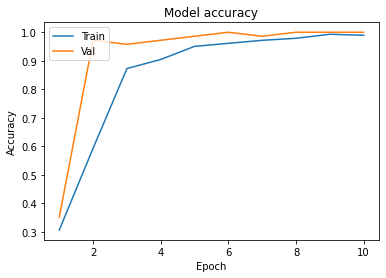

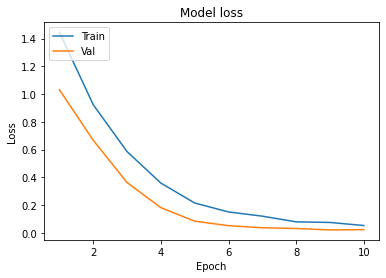

In [ ]:
plot_learningCurve(history, 10)


# **Confusion Matrix**

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
# x_test

In [ ]:
# mat = confusion_matrix(y_test, y_pred)
# plot_confusion_matrix(conf_mat=mat, class_names=label.classes_, show_normed=True, figsize=(7,7))

ValueError: ignored

In [ ]:
y_test

array([2, 0, 1, 2, 1, 1, 1, 3, 0, 0, 0, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 2,
       2, 3, 3, 2, 0, 3, 0, 3, 0, 3, 3, 3, 2, 1, 2, 0, 0, 1, 2, 1, 3, 0,
       2, 0, 2, 1, 0, 3, 1, 2, 3, 1, 3, 2, 2, 3, 3, 3, 2, 3, 2, 0, 2, 0,
       0, 0, 1, 3, 2])

In [ ]:
y_test.shape

(71,)

In [ ]:
y_pred.shape

(71, 6)

In [ ]:
y_pred

In [ ]:
MaxInEachRow = []
for i in range(len(y_pred)):
  MaxInEachRow.append(np.where(y_pred == np.amax(y_pred[i]))) 
MaxInEachRow